In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load & split the data

In [84]:
# load the Kaggle Washington bikesharing dataset
df = pd.read_csv('../data/train.csv', parse_dates=['datetime'])
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [85]:
# split into x and y data
X = df.drop(['count'], axis=1)
y = df['count']
X.head(5)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1


In [86]:
# make train-test-split to create train and validation data
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
2815,2011-07-06 05:00:00,3,0,1,1,27.88,31.820,83,6.0032,5,30
8695,2012-08-04 16:00:00,3,0,0,1,36.90,40.910,39,19.9995,197,253
8406,2012-07-11 15:00:00,3,0,1,1,32.80,35.605,41,16.9979,56,220
1543,2011-04-10 04:00:00,2,0,0,2,14.76,18.180,93,7.0015,3,2
4952,2011-11-19 10:00:00,4,0,0,1,13.12,15.150,45,16.9979,35,165


In [87]:
# create complete train DataFrame (X + y data)
df_train = pd.merge(Xtrain, ytrain, left_index=True, right_index=True)
df_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2815,2011-07-06 05:00:00,3,0,1,1,27.88,31.820,83,6.0032,5,30,35
8695,2012-08-04 16:00:00,3,0,0,1,36.90,40.910,39,19.9995,197,253,450
8406,2012-07-11 15:00:00,3,0,1,1,32.80,35.605,41,16.9979,56,220,276
1543,2011-04-10 04:00:00,2,0,0,2,14.76,18.180,93,7.0015,3,2,5
4952,2011-11-19 10:00:00,4,0,0,1,13.12,15.150,45,16.9979,35,165,200


In [88]:
# check if days are missing
X['day'] = X['datetime'].dt.day
print(X['day'].unique())
X.drop(columns='day', inplace=True)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

observation: the last days (from day 20) are missing for each month (-> test data)

### 2. create the time features (from datetime)

In [90]:
# create new columns with hours, year, day, workday, season from date
df_train['hour'] = df_train['datetime'].dt.hour
df_train['day'] = df_train['datetime'].dt.day
df_train['weekday'] = df_train['datetime'].dt.dayofweek
df_train['week'] = df_train['datetime'].dt.week
df_train['month'] = df_train['datetime'].dt.month
df_train['quarter'] = df_train['datetime'].dt.quarter
df_train['year'] = df_train['datetime'].dt.year
df_train.head(5)

/tmp/ipykernel_18011/2306731502.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week'] = df_train['datetime'].dt.week


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,weekday,week,month,quarter,year
2815,2011-07-06 05:00:00,3,0,1,1,27.88,31.820,83,6.0032,5,30,35,5,6,2,27,7,3,2011
8695,2012-08-04 16:00:00,3,0,0,1,36.90,40.910,39,19.9995,197,253,450,16,4,5,31,8,3,2012
8406,2012-07-11 15:00:00,3,0,1,1,32.80,35.605,41,16.9979,56,220,276,15,11,2,28,7,3,2012
1543,2011-04-10 04:00:00,2,0,0,2,14.76,18.180,93,7.0015,3,2,5,4,10,6,14,4,2,2011
4952,2011-11-19 10:00:00,4,0,0,1,13.12,15.150,45,16.9979,35,165,200,10,19,5,46,11,4,2011


In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 2815 to 7270
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    8708 non-null   datetime64[ns]
 1   season      8708 non-null   int64         
 2   holiday     8708 non-null   int64         
 3   workingday  8708 non-null   int64         
 4   weather     8708 non-null   int64         
 5   temp        8708 non-null   float64       
 6   atemp       8708 non-null   float64       
 7   humidity    8708 non-null   int64         
 8   windspeed   8708 non-null   float64       
 9   casual      8708 non-null   int64         
 10  registered  8708 non-null   int64         
 11  count       8708 non-null   int64         
 12  hour        8708 non-null   int64         
 13  day         8708 non-null   int64         
 14  weekday     8708 non-null   int64         
 15  week        8708 non-null   int64         
 16  month       8708 non-

### 3. Explorative data analysis (EDA)

In [93]:
# get correlation matrix of train data
corr_matrix_train = df_train.corr()

#### 3.1 plot correlation matrix

<AxesSubplot:>

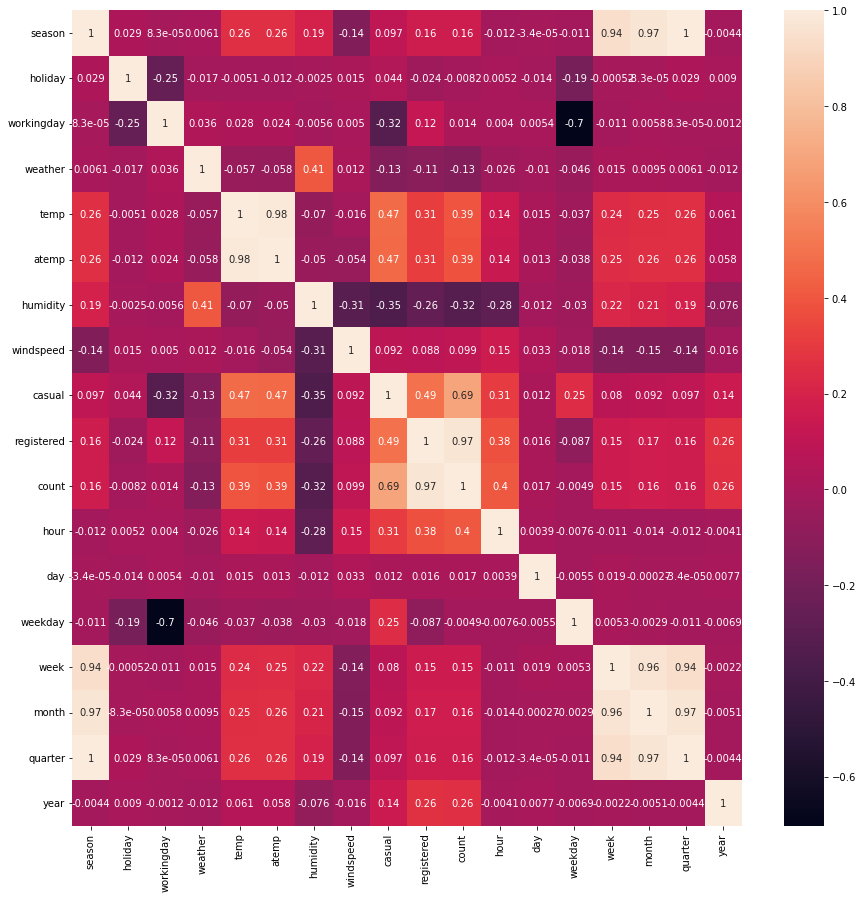

In [94]:
# plot the correlation matrix in a heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(data=corr_matrix_train, annot=True)

observations: high correlation between temp and atemp. Also between the timely features (week, month,season)

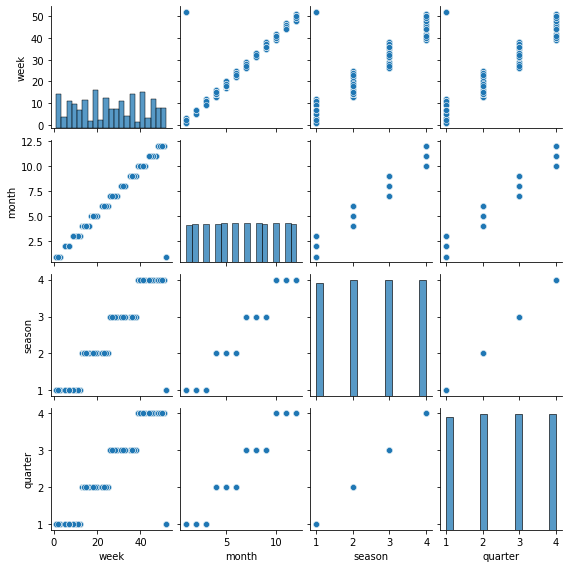

In [95]:
# check the high correlation of the timely features by scatterplots (pairplots)
sns.pairplot(data=df_train, vars=['week', 'month', 'season', 'quarter'], height=2)

observations: quarter and season equal (one has to be dropped), for week (in year), month, season better choose the most important one due to high correlation 

#### 3.2 plot correlations of all features with casual, registered and total users (count)

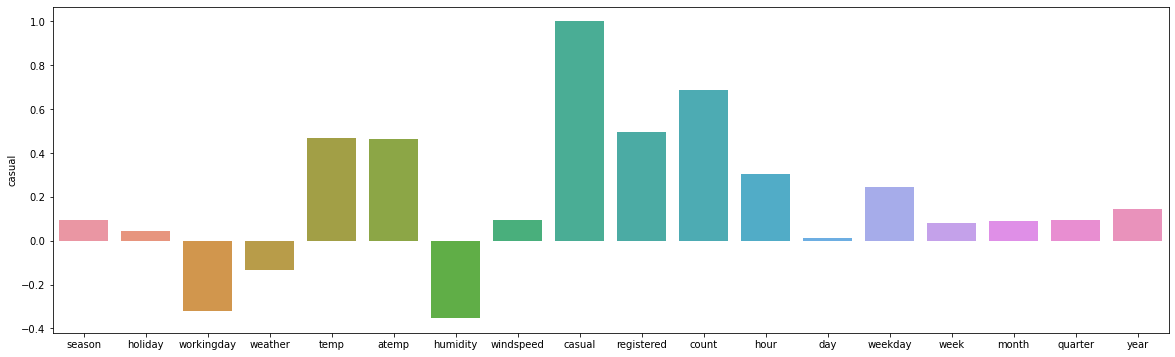

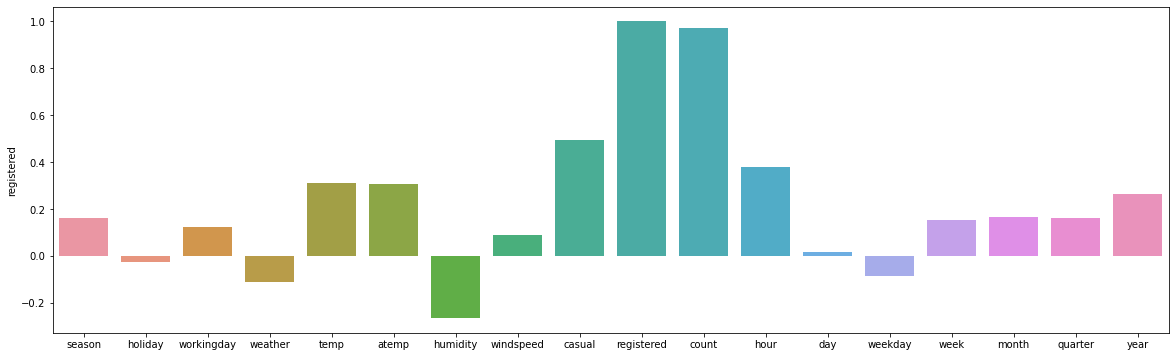

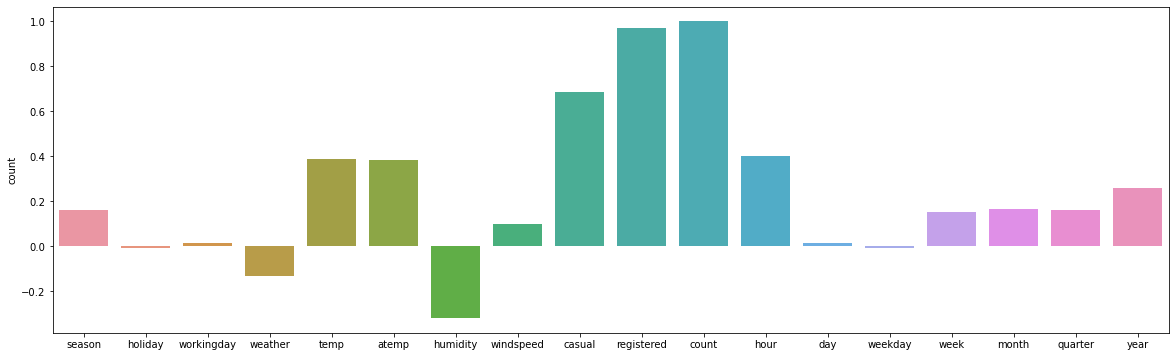

In [96]:
#2.3 what is the diffence in behavoir of casuals and subscribers
plot_features = ['casual', 'registered', 'count']

for plot_feature in plot_features:
    df_corr_cas = pd.DataFrame(data=corr_matrix_train[plot_feature], columns=[plot_feature])
    plt.subplots(figsize=(20,6))
    sns.barplot(data=df_corr_cas, x=corr_matrix_train.index, y=plot_feature)

observations: hour, temp, humidity, month, quarter and year have a high correlation with the target (count)

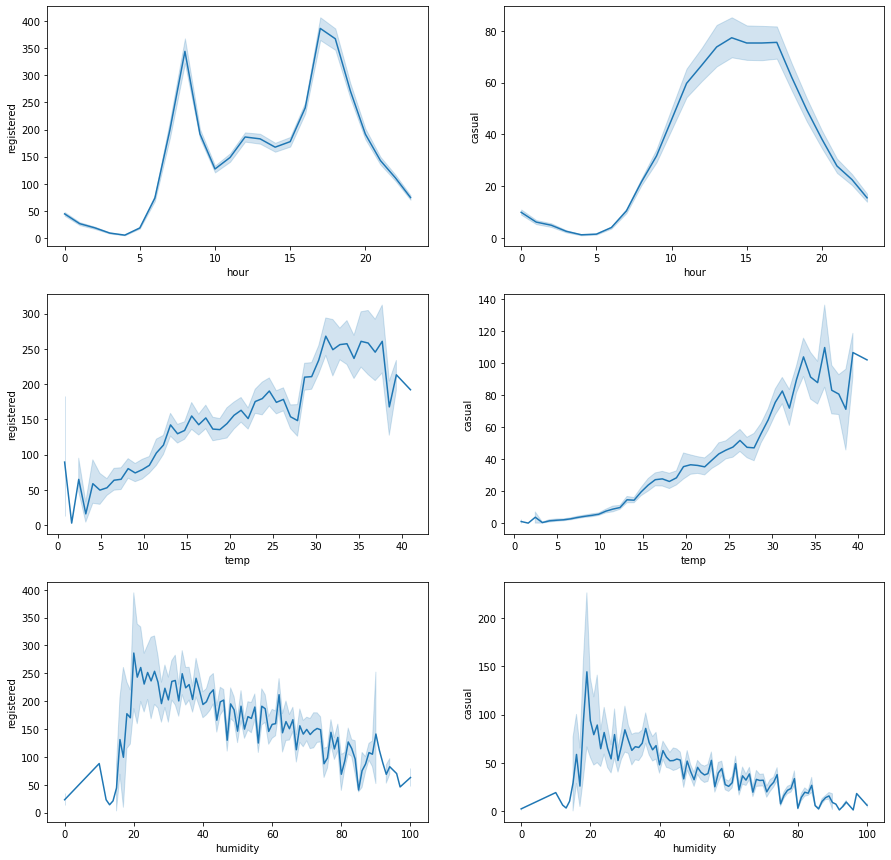

In [99]:
# plot lineplots of features (x-axis) and registered & casual (y-axis)
features_line = ['hour', 'temp', 'humidity']
fig, axs = plt.subplots(figsize=(15, 5 * len(features_line)), nrows=len(features_line), ncols=2)
for i, feature in enumerate(features_line):
    sns.lineplot(data=df_train, x=feature, y='registered', ax=axs[i, 0])
    sns.lineplot(data=df_train, x=feature, y='casual', ax=axs[i, 1])

observations: casuals are more renting on non-working days, are more sensitive to temperatures, not so depending on certain hours
registered are have 2 spikes during the rush hour

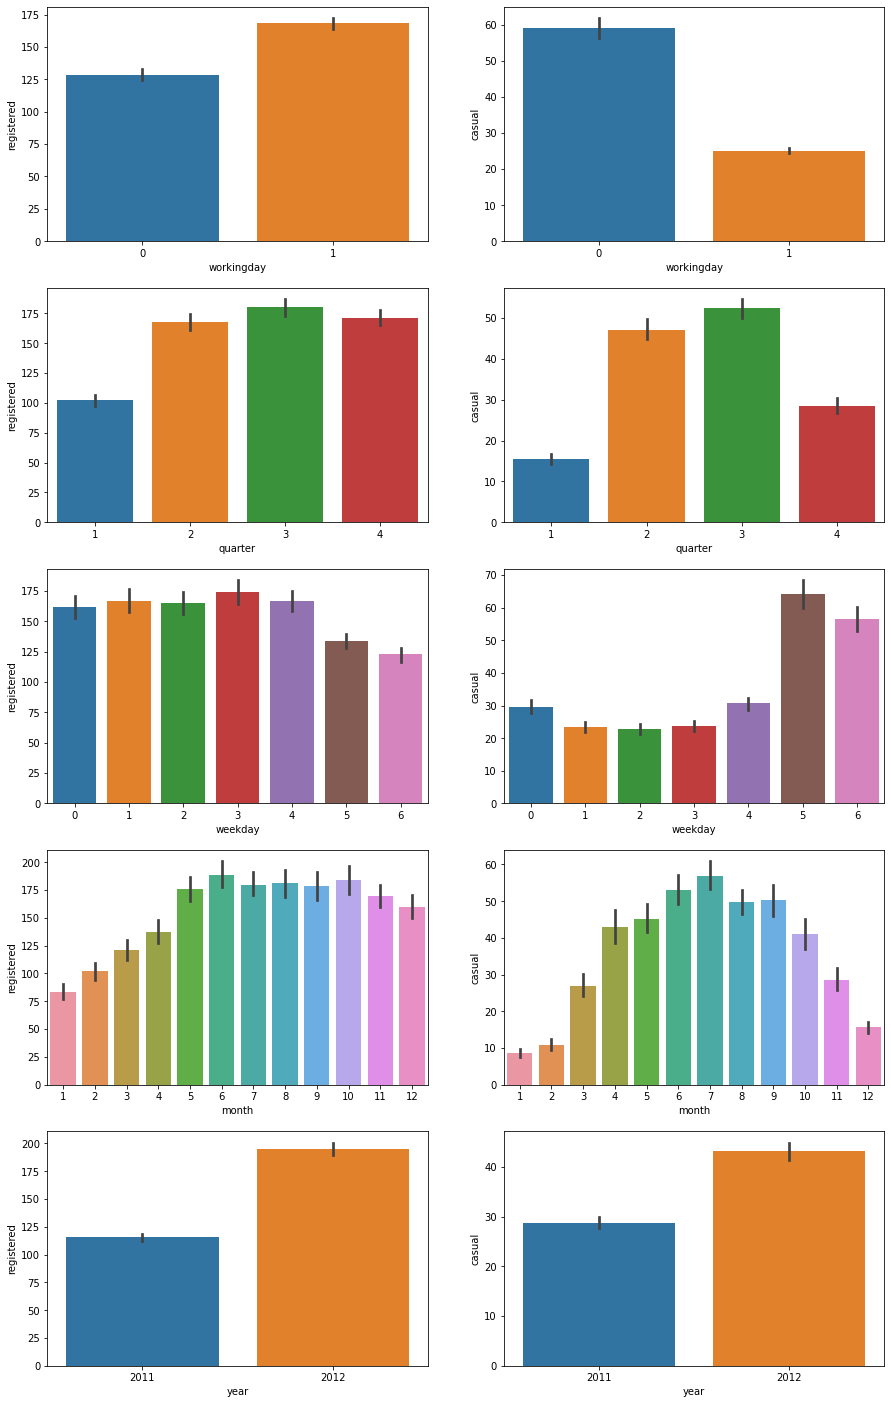

In [100]:
# plot barplots of features (x-axis) and registered & casual (y-axis)
features_bar = ['workingday', 'quarter', 'weekday', 'month', 'year']
fig, axs = plt.subplots(figsize=(15, 5 * len(features_bar)), nrows=len(features_bar), ncols=2)
for i, feature in enumerate(features_bar):
    sns.barplot(data=df_train, x=feature, y='registered', ax=axs[i,0])
    sns.barplot(data=df_train, x=feature, y='casual', ax=axs[i,1])

observations:
registered: are using the bikes nearly all year long (a little less in Jan-April) and throughout the whole week
casuals: are using the bike mainly from Aprot to October but nit so much in winter. They are using the bikes mainly on weekends/non-workingdays
both: demand strongly increase from 2011 to 2012